In [1]:
%pip install efficientnet

     -------------------------------------- 50.7/50.7 kB 860.9 kB/s eta 0:00:00
     -------------------------------------- 12.0/12.0 MB 671.0 kB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 215.1/215.1 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
###os.environ["DML_VISIBLE_DEVICES"] = "0" 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
import cv2
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import efficientnet.keras as efn
from keras import layers

# Load the file from the dataset

In [2]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'archive/train',
        target_size=(64, 64),
        batch_size=64,
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'archive/test',
        target_size=(64,64),
        batch_size=64,
        class_mode='categorical')

Found 2352 images belonging to 7 classes.
Found 586 images belonging to 7 classes.


In [3]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Split the dataset into test , train

# CNN Model to predict the Mood 

In [6]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

base_model = efn.EfficientNetB0(input_shape = (64,64,3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False


# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(7, activation='softmax')(x)

model1 = tf.keras.models.Model(base_model.input, x)

model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [7]:
history=model1.fit(train_generator,epochs=40,validation_data=validation_generator)


Epoch 1/40
37/37 [==============================] - 44s 888ms/step - loss: 2.0877 - accuracy: 0.2207 - val_loss: 1.7419 - val_accuracy: 0.3259
Epoch 2/40
37/37 [==============================] - 26s 686ms/step - loss: 1.7808 - accuracy: 0.2806 - val_loss: 1.6551 - val_accuracy: 0.3601
Epoch 3/40
37/37 [==============================] - 25s 685ms/step - loss: 1.7208 - accuracy: 0.3248 - val_loss: 1.6034 - val_accuracy: 0.4061
Epoch 4/40
37/37 [==============================] - 25s 661ms/step - loss: 1.6714 - accuracy: 0.3444 - val_loss: 1.5801 - val_accuracy: 0.4078
Epoch 5/40
37/37 [==============================] - 25s 680ms/step - loss: 1.6224 - accuracy: 0.3554 - val_loss: 1.5618 - val_accuracy: 0.3942
Epoch 6/40
37/37 [==============================] - 25s 670ms/step - loss: 1.5828 - accuracy: 0.3946 - val_loss: 1.5390 - val_accuracy: 0.3874
Epoch 7/40
37/37 [==============================] - 25s 682ms/step - loss: 1.5660 - accuracy: 0.3975 - val_loss: 1.4582 - val_accuracy: 0.4608

In [8]:
model1.save('project_kdef_efficientnet')

INFO:tensorflow:Assets written to: project_kdef_efficientnet\assets


INFO:tensorflow:Assets written to: project_kdef_efficientnet\assets


# Plot the Graph to check the how good the model is working

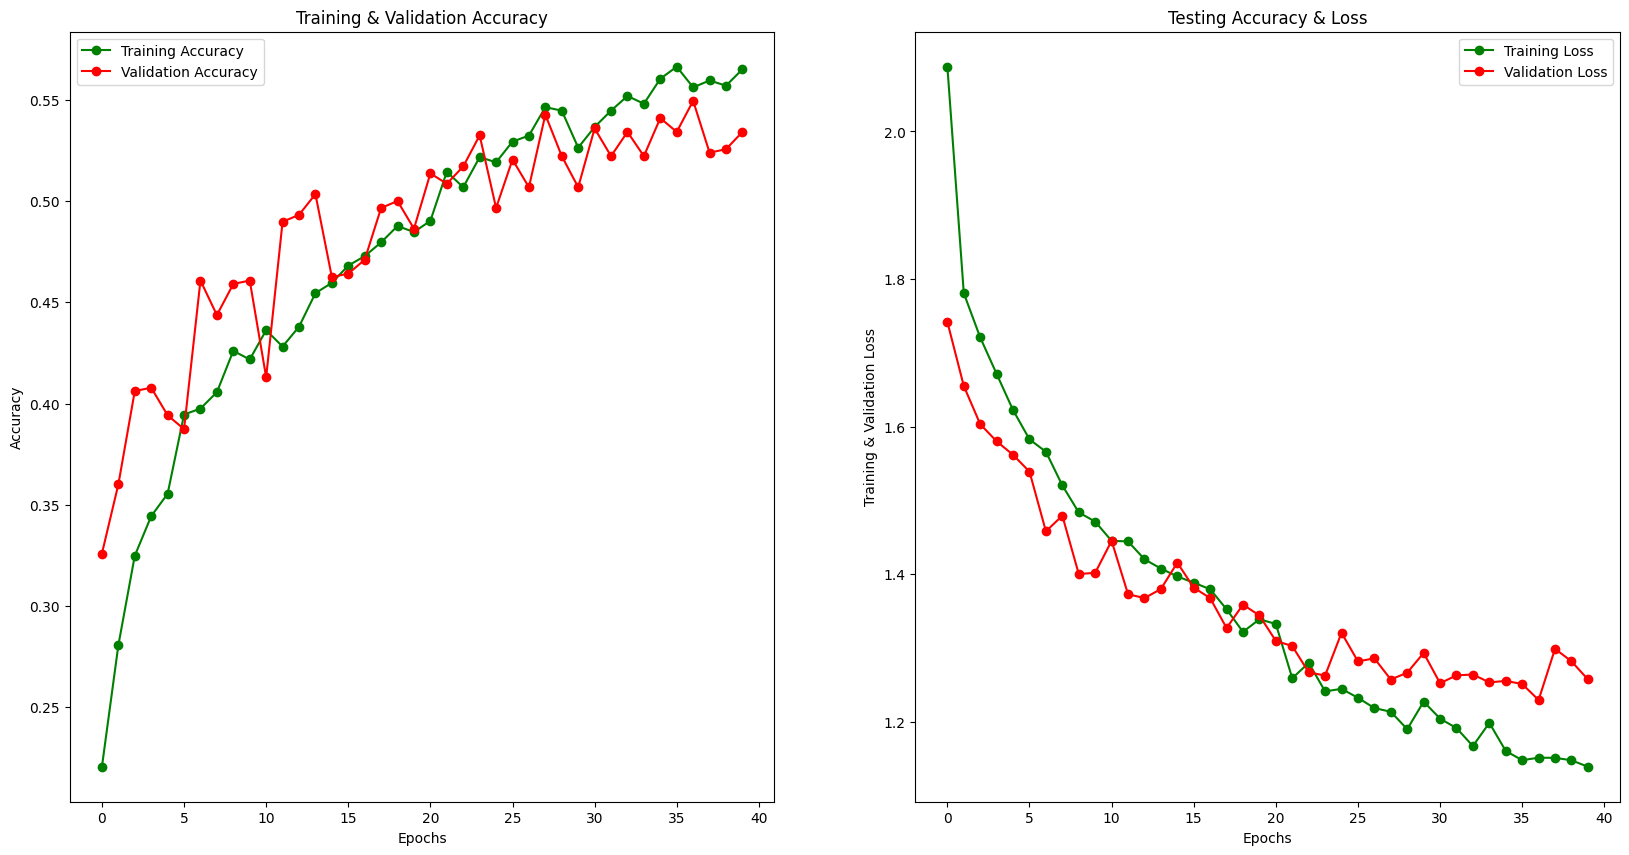

In [10]:
import matplotlib.pyplot as plt
epochs = [i for i in range(40)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

# Creating Confusion Matrix to know the performance of Model

37/37 [==============================] - 21s 505ms/step
-----------------------------------------------------------------
[[57 38 27 37 72 41 64]
 [67 25 20 39 75 34 76]
 [50 47 29 40 70 30 70]
 [47 21 32 51 73 31 81]
 [61 36 28 42 62 29 78]
 [64 31 26 45 60 35 75]
 [46 33 32 50 66 31 78]]


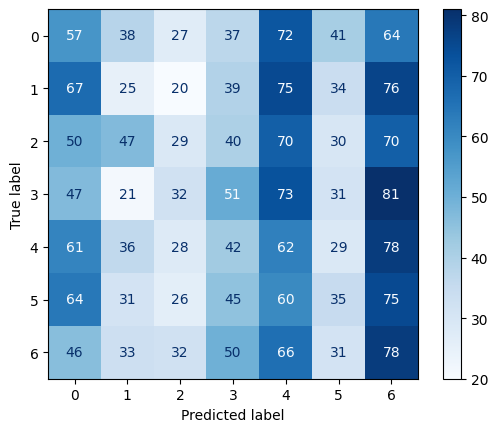

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.15      0.17      0.16       336
           1       0.11      0.07      0.09       336
           2       0.15      0.09      0.11       336
           3       0.17      0.15      0.16       336
           4       0.13      0.18      0.15       336
           5       0.15      0.10      0.12       336
           6       0.15      0.23      0.18       336

    accuracy                           0.14      2352
   macro avg       0.14      0.14      0.14      2352
weighted avg       0.14      0.14      0.14      2352



In [11]:
tr_predictions = model1.predict(train_generator)
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(train_generator.classes, tr_predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(train_generator.classes, tr_predictions.argmax(axis=1)))
clf_report = classification_report(train_generator.classes, tr_predictions.argmax(axis=1),output_dict=True)

<AxesSubplot: >

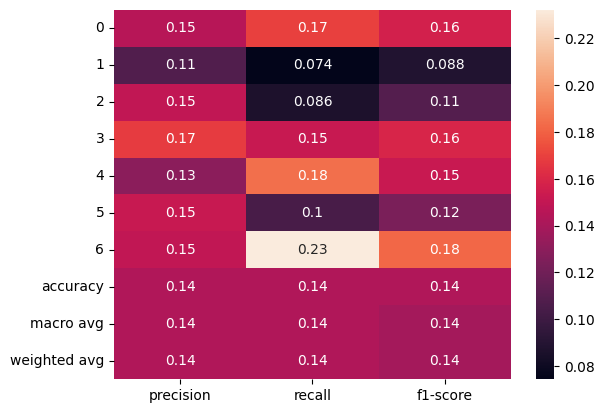

In [12]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

10/10 [==============================] - 6s 630ms/step
-----------------------------------------------------------------
[[19  9  6 10 18  6 16]
 [14  8 11  7 20  6 18]
 [11 10 12  6 28  6 11]
 [ 7 11 13 13 23  7 10]
 [ 9  8 13 12 21  5 16]
 [16  8  6  7 25 10 11]
 [14  5  5 13 30  6 10]]


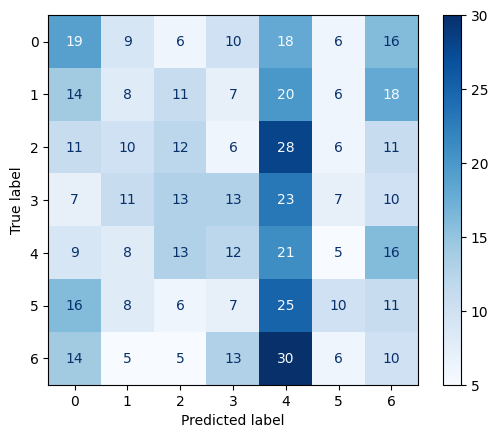

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.21      0.23      0.22        84
           1       0.14      0.10      0.11        84
           2       0.18      0.14      0.16        84
           3       0.19      0.15      0.17        84
           4       0.13      0.25      0.17        84
           5       0.22      0.12      0.16        83
           6       0.11      0.12      0.11        83

    accuracy                           0.16       586
   macro avg       0.17      0.16      0.16       586
weighted avg       0.17      0.16      0.16       586



In [13]:
# do prediction on test data
predictions = model1.predict(validation_generator)
print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(validation_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(validation_generator.classes, predictions.argmax(axis=1)))
clf_report1 = classification_report(validation_generator.classes, predictions.argmax(axis=1),output_dict=True)

<AxesSubplot: >

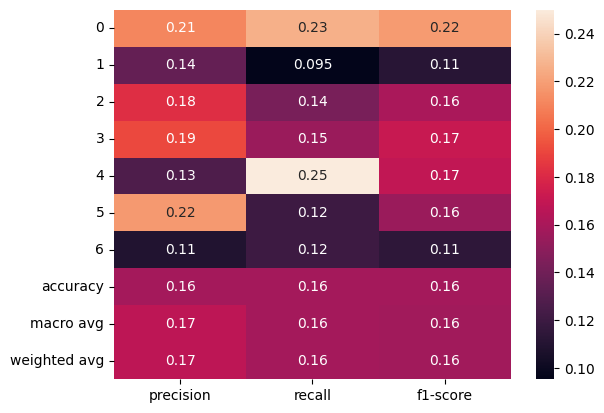

In [14]:
sns.heatmap(pd.DataFrame(clf_report1).iloc[:-1, :].T, annot=True)

1/1 [==============================] - 4s 4s/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.2192476e-33]
Disgusted


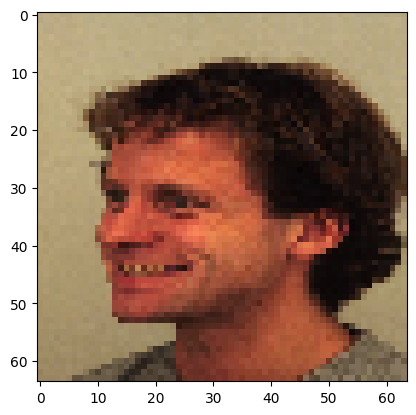

In [16]:
img = load_img(r"C:\Users\HP\Desktop\Fiverr\69.DL_classification_TL\KDEF\archive\test\happy\112_1.jpg",target_size = (64,64))
img = np.array(img)
plt.imshow(img)

img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,64,64,3)
result = model1.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(emotion_dict[img_index])

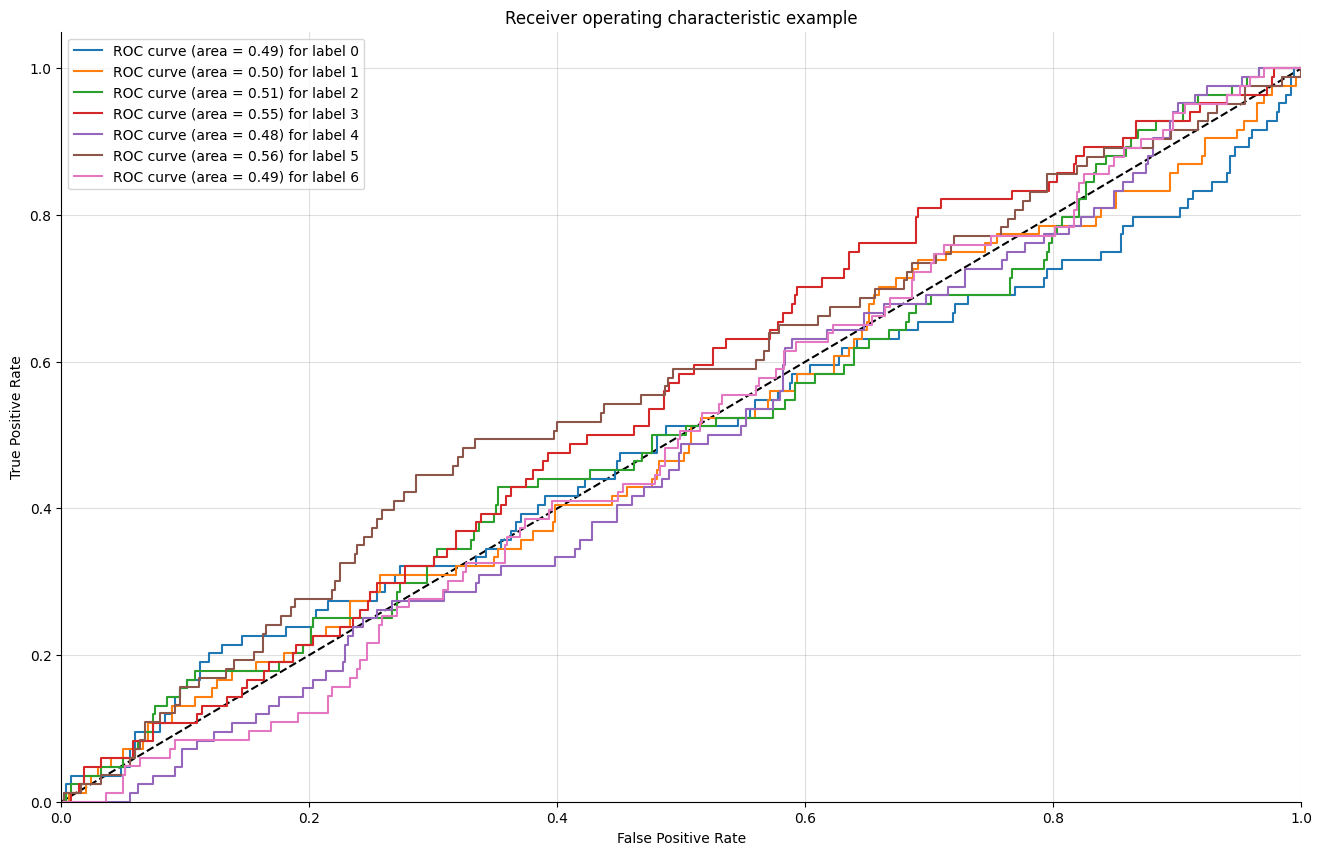

In [17]:
def plot_multiclass_roc( prediction, y_test, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], prediction[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(predictions, validation_generator.classes, n_classes=7, figsize=(16, 10))